In [ ]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator   
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
from PIL import Image

In [ ]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [ ]:
!unrar x /content/Flower.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Flower.rar

Creating    Flower                                                    OK
Extracting  Flower/Daisy (1).jpg                                           0%  OK 
Extracting  Flower/Daisy (10).jpg                                          0%  OK 
Extracting  Flower/Daisy (100).jpg                                         0%  OK 
Extracting  Flower/Daisy (101).jpg                                         0%  OK 
Extracting  Flower/Daisy (102).jpg                                         0%  OK 
Extracting  Flower/Daisy (103).jpg                                         0%  OK 
Extracting  Flower/Daisy (104).jpg                                         0%  OK 
Extracting  Flower/Daisy (105).jpg                                         0%  OK 
Extracting  Flower/Daisy (106).jpg                                         0%

In [ ]:
Images=os.listdir("/content/Flower")
Images

['Rose (12).jpg',
 'Rose (575).jpg',
 'Dandelion (1052).jpg',
 'Dandelion (735).jpg',
 'Rose (266).jpg',
 'Dandelion (460).jpg',
 'Rose (765).jpg',
 'Tulip (157).jpg',
 'Dandelion (839).jpg',
 'Sunflower (372).jpg',
 'Daisy (462).jpg',
 'Rose (183).jpg',
 'Dandelion (178).jpg',
 'Tulip (572).jpg',
 'Tulip (869).jpg',
 'Sunflower (714).jpg',
 'Dandelion (291).jpg',
 'Sunflower (459).jpg',
 'Rose (429).jpg',
 'Tulip (563).jpg',
 'Sunflower (583).jpg',
 'Dandelion (755).jpg',
 'Tulip (770).jpg',
 'Tulip (365).jpg',
 'Tulip (882).jpg',
 'Dandelion (188).jpg',
 'Sunflower (105).jpg',
 'Dandelion (841).jpg',
 'Daisy (638).jpg',
 'Dandelion (975).jpg',
 'Tulip (645).jpg',
 'Tulip (605).jpg',
 'Rose (373).jpg',
 'Daisy (244).jpg',
 'Sunflower (221).jpg',
 'Tulip (883).jpg',
 'Dandelion (106).jpg',
 'Rose (331).jpg',
 'Rose (690).jpg',
 'Tulip (732).jpg',
 'Tulip (438).jpg',
 'Daisy (29).jpg',
 'Rose (53).jpg',
 'Daisy (296).jpg',
 'Daisy (137).jpg',
 'Daisy (143).jpg',
 'Rose (259).jpg',
 'Dan

In [ ]:
Flower1=[]
for flower_name in Images:
    category=flower_name.split(' ')[0]
    if category=='Sunflower':
        Flower1.append("Sunflower")
    elif category=="Daisy":
        Flower1.append("Daisy")
    elif category=="Tulip":
        Flower1.append("Tulip")
    elif category=="Rose":
        Flower1.append("Rose")
    elif category=="Dandelion":
        Flower1.append("Dandelion")

df=pd.DataFrame({'Image_f':Images,'Flowers':Flower1})

In [ ]:
model=Sequential()

model.add(Conv2D(75,(2,2),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(25,(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(50,(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(25,(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(5,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
train_df,test_df = train_test_split(df,test_size=0.2,random_state=4)

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

total_train=train_df.shape[0]
total_test=test_df.shape[0]
batch_size=50
train_df

,Image_f,Flowers
0,Dandelion (989).jpg,Dandelion
1,Rose (376).jpg,Rose
2,Rose (664).jpg,Rose
3,Daisy (728).jpg,Daisy
4,Dandelion (55).jpg,Dandelion
...,...,...
3456,Tulip (58).jpg,Tulip
3457,Daisy (91).jpg,Daisy
3458,Rose (245).jpg,Rose
3459,Rose (465).jpg,Rose


In [ ]:
train_dg = ImageDataGenerator(rotation_range=30,rescale=1./255,shear_range=0.1,zoom_range=0.2,horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)

train_gen = train_dg.flow_from_dataframe(train_df,"/content/Flower",x_col='Image_f',y_col='Flowers',target_size=Image_Size,class_mode='categorical',batch_size=batch_size)

Found 3461 validated image filenames belonging to 5 classes.


In [ ]:
test_gen = train_dg.flow_from_dataframe(test_df,"/content/Flower",x_col='Image_f',y_col='Flowers',target_size=Image_Size,class_mode='categorical',batch_size=batch_size)

Found 866 validated image filenames belonging to 5 classes.


In [ ]:
from keras.callbacks import ReduceLROnPlateau
callback = ReduceLROnPlateau(monitor = 'accuracy',patience = 3,verbose = 2,factor = 0.7,min_lr = 0.000001)

In [ ]:
epochs=100 
CLASS_MODEL = model.fit(
    train_gen, 
    epochs=epochs,
    validation_data=test_gen,
    validation_steps=total_test//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callback
)

Epoch 1/100
69/69 [==============================] - 154s 2s/step - loss: 1.2233 - accuracy: 0.5169 - val_loss: 1.8704 - val_accuracy: 0.2200
Epoch 2/100
69/69 [==============================] - 152s 2s/step - loss: 1.0038 - accuracy: 0.5966 - val_loss: 2.5063 - val_accuracy: 0.2200
Epoch 3/100
69/69 [==============================] - 152s 2s/step - loss: 0.9085 - accuracy: 0.6514 - val_loss: 2.9376 - val_accuracy: 0.2212
Epoch 4/100
69/69 [==============================] - 152s 2s/step - loss: 0.8753 - accuracy: 0.6643 - val_loss: 2.7281 - val_accuracy: 0.2176
Epoch 5/100
69/69 [==============================] - 152s 2s/step - loss: 0.8371 - accuracy: 0.6810 - val_loss: 2.1202 - val_accuracy: 0.2482
Epoch 6/100
69/69 [==============================] - 157s 2s/step - loss: 0.7998 - accuracy: 0.6910 - val_loss: 1.8004 - val_accuracy: 0.2976
Epoch 7/100
69/69 [==============================] - 154s 2s/step - loss: 0.7625 - accuracy: 0.7071 - val_loss: 1.2157 - val_accuracy: 0.5082
Epoch 

In [ ]:
!mkdir -p saved_model
model.save('flower_classification_100epoch.h5') 

IT'S A SUNFLOWER


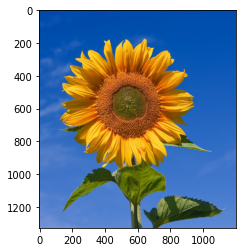

In [ ]:
y1=Image.open("/content/sunflower 1.jpg")     #image outside the training data from google 
plt.imshow(y1)                 
y1=y1.resize(Image_Size)            #u need to resize it on the basis pf your  model's image shape
y1=np.expand_dims(y1,axis=0)    
y1=np.array(y1)
y1=y1/255          
output= model.predict([y1])[0]      #final value of  the value of image
output=np.argmax(output)
if(output==0):
        {
          print("IT'S A DAISY")0
        }
elif(output==1):
        {
          print("IT'S A DANDELION")
        }
elif(output==2):
        {
          print("IT'S A ROSE")
        }
elif(output==3):
        {
          print("IT'S A SUNFLOWER")
        }
elif(output==4):
        {
          print("IT'S A TULIP")
        }

IT'S A DAISY


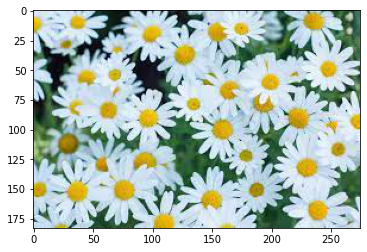

In [ ]:
y1=Image.open("/content/daisy 1.jpg")     #image outside the training data from google 
plt.imshow(y1)                 
y1=y1.resize(Image_Size)            #u need to resize it on the basis pf your  model's image shape
y1=np.expand_dims(y1,axis=0)    
y1=np.array(y1)
y1=y1/255          
output= model.predict([y1])[0]      #final value of  the value of image
output=np.argmax(output)
if(output==0):
        {
          print("IT'S A DAISY")
        }
elif(output==1):
        {
          print("IT'S A DANDELION")
        }
elif(output==2):
        {
          print("IT'S A ROSE")
        }
elif(output==3):
        {
          print("IT'S A SUNFLOWER")
        }
elif(output==4):
        {
          print("IT'S A TULIP")
        }

IT'S A DANDELION


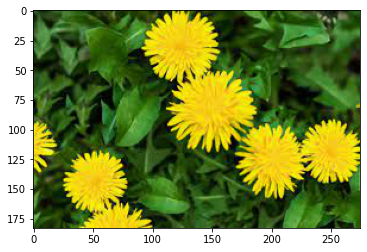

In [ ]:
y1=Image.open("/content/dandelion1.jpg")     #image outside the training data from google 
plt.imshow(y1)                 
y1=y1.resize(Image_Size)            #u need to resize it on the basis pf your  model's image shape
y1=np.expand_dims(y1,axis=0)    
y1=np.array(y1)
y1=y1/255          
output= model.predict([y1])[0]      #final value of  the value of image
output=np.argmax(output)
if(output==0):
        {
          print("IT'S A DAISY")
        }
elif(output==1):
        {
          print("IT'S A DANDELION")
        }
elif(output==2):
        {
          print("IT'S A ROSE")
        }
elif(output==3):
        {
          print("IT'S A SUNFLOWER")
        }
elif(output==4):
        {
          print("IT'S A TULIP")
        }

IT'S A ROSE


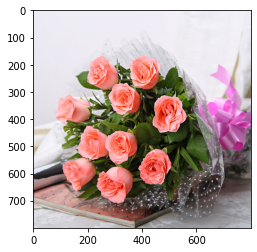

In [ ]:
y1=Image.open("/content/rose 1.jpg")     #image outside the training data from google 
plt.imshow(y1)                 
y1=y1.resize(Image_Size)            #u need to resize it on the basis pf your  model's image shape
y1=np.expand_dims(y1,axis=0)    
y1=np.array(y1)
y1=y1/255          
output= model.predict([y1])[0]      #final value of  the value of image
output=np.argmax(output)
if(output==0):
        {
          print("IT'S A DAISY")
        }
elif(output==1):
        {
          print("IT'S A DANDELION")
        }
elif(output==2):
        {
          print("IT'S A ROSE")
        }
elif(output==3):
        {
          print("IT'S A SUNFLOWER")
        }
elif(output==4):
        {
          print("IT'S A TULIP")
        }

IT'S A TULIP


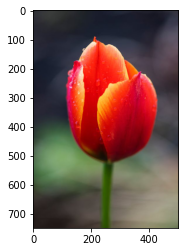

In [ ]:
y1=Image.open("/content/tulip 1.jpeg")     #image outside the training data from google 
plt.imshow(y1)                 
y1=y1.resize(Image_Size)            #u need to resize it on the basis pf your  model's image shape
y1=np.expand_dims(y1,axis=0)    
y1=np.array(y1)
y1=y1/255          
output= model.predict([y1])[0]      #final value of  the value of image
output=np.argmax(output)
if(output==0):
        {
          print("IT'S A DAISY")
        }
elif(output==1):
        {
          print("IT'S A DANDELION")
        }
elif(output==2):
        {
          print("IT'S A ROSE")
        }
elif(output==3):
        {
          print("IT'S A SUNFLOWER")
        }
elif(output==4):
        {
          print("IT'S A TULIP")
        }